In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper8.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper1.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock4.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors3.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock2.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper3.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper7.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors5.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors7.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock9.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors8.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/valid

In [2]:
%config Completer.use_jedi = False

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
IMG_SIZE = (160,160)
BATCH_SIZE = 32
PATH = '/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [6]:
IMG_SIZE = (160,160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = MobileNetV2(include_top = False, weights='imagenet', input_shape = IMG_SHAPE)

9420800/9406464 [==============================] - 0s 0us/step


In [7]:
base_model.trainable = False

In [8]:
inputs = tf.keras.Input(shape = IMG_SHAPE)
x  = preprocess_input(inputs)
print(x)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(units = 3)(x)
model = tf.keras.Model(inputs, outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), name='tf.math.subtract/Sub:0', description="created by layer 'tf.math.subtract'")


In [9]:
base_learning_rate = 0.0001
model.compile(tf.keras.optimizers.Adam(learning_rate=base_learning_rate), tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843  

In [11]:
initial_epochs = 10
history = model.fit(train_dataset, validation_data = test_dataset, epochs = initial_epochs)

Epoch 1/10


2022-02-03 11:54:38.726860: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


79/79 [==============================] - 26s 280ms/step - loss: 1.1527 - accuracy: 0.4242 - val_loss: 0.7692 - val_accuracy: 0.6667
Epoch 2/10
79/79 [==============================] - 19s 238ms/step - loss: 0.6707 - accuracy: 0.7246 - val_loss: 0.5600 - val_accuracy: 0.7554
Epoch 3/10
79/79 [==============================] - 20s 253ms/step - loss: 0.4270 - accuracy: 0.8690 - val_loss: 0.4355 - val_accuracy: 0.8226
Epoch 4/10
79/79 [==============================] - 20s 246ms/step - loss: 0.2997 - accuracy: 0.9317 - val_loss: 0.3623 - val_accuracy: 0.8790
Epoch 5/10
79/79 [==============================] - 19s 238ms/step - loss: 0.2333 - accuracy: 0.9536 - val_loss: 0.3097 - val_accuracy: 0.9382
Epoch 6/10
79/79 [==============================] - 21s 263ms/step - loss: 0.1872 - accuracy: 0.9663 - val_loss: 0.2597 - val_accuracy: 0.9462
Epoch 7/10
79/79 [==============================] - 20s 251ms/step - loss: 0.1614 - accuracy: 0.9710 - val_loss: 0.2285 - val_accuracy: 0.9624
Epoch 8/10

In [12]:
import matplotlib.pyplot as plt

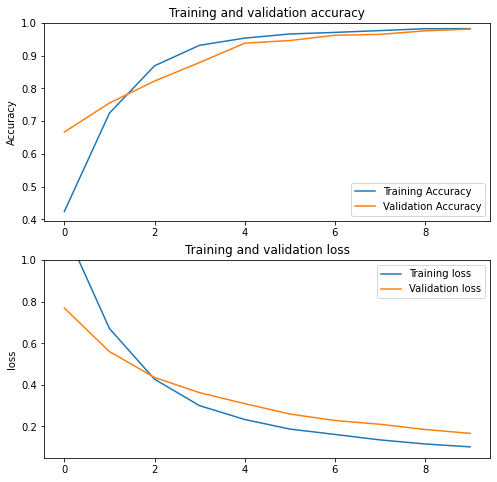

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and validation accuracy')

plt.subplot(2,1,2)
plt.plot(loss, label = 'Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc = 'upper right')
plt.ylabel('loss')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and validation loss')
plt.show()

In [14]:
from tensorflow.keras.preprocessing import image

In [15]:
img_path= os.path.join(validation_dir, 'paper2.png')
img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


In [16]:
class_names = train_dataset.class_names

In [17]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to paper with a 93.33 percent confidence.
